# CNN in PyTorch

lets import some sample images and explore the concepts of the Cnn

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_sample_images

sample_images = np.stack(load_sample_images()['images'])
sample_images = torch.tensor(sample_images, dtype=torch.float32) / 255.0


We have two images, both are 427 pixels high and 640 pixels wide, and they have
three color channels: red, green, and blue.  PyTorch expects
the channel dimension to be just before the height and width dimensions, not after, so
we need to permute the dimensions using the permute() method:

In [4]:
sample_images.shape

torch.Size([2, 427, 640, 3])

In [5]:
sample_images_permuted = torch.permute(sample_images, (0, 3, 1, 2))
sample_images_permuted.shape

torch.Size([2, 3, 427, 640])

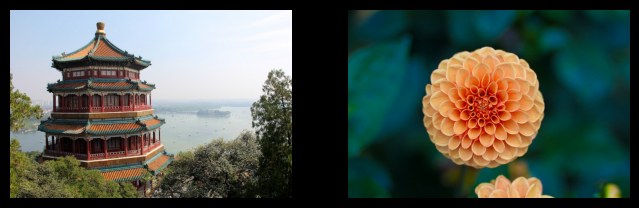

In [6]:
def plot_image(image):
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")

plt.figure(figsize=(8, 4))
for index, image in enumerate(sample_images_permuted):
    plt.subplot(1, 2, index + 1)
    plot_image(image)

In [7]:
import torchvision
import torchvision.transforms.v2 as T
cropped_images = T.CenterCrop((70,120))(sample_images_permuted)
cropped_images.shape

torch.Size([2, 3, 70, 120])

Now let’s create a 2D convolutional layer and feed it these cropped images to see
what comes out. For this, PyTorch provides the nn.Conv2d layer.

Under the hood, this
layer relies on the `torch.nn.((("torch", "F.conv2d()")))functional.conv2d()`
function. Let’s create a convolutional layer with 32 filters, each of size 7 × 7 (using
kernel_size=7

In [8]:
import torch.nn as nn

torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7, 7),padding='same')
fmaps = conv_layer(cropped_images)

In [9]:
fmaps.shape

torch.Size([2, 32, 70, 120])

In [10]:
conv_layer.weight.shape

torch.Size([32, 3, 7, 7])

In [11]:
conv_layer.bias.shape

torch.Size([32])

## Implementing Pooling Layers with PyTorch

In [30]:
max_pool = nn.MaxPool2d(kernel_size=2)

In [31]:
output_max = max_pool(cropped_images)
output_max.shape

torch.Size([2, 3, 35, 60])

In [32]:

avg_pool = nn.AvgPool2d(kernel_size=2)

In [33]:

output_avg = avg_pool(cropped_images)
output_avg.shape

torch.Size([2, 3, 35, 60])

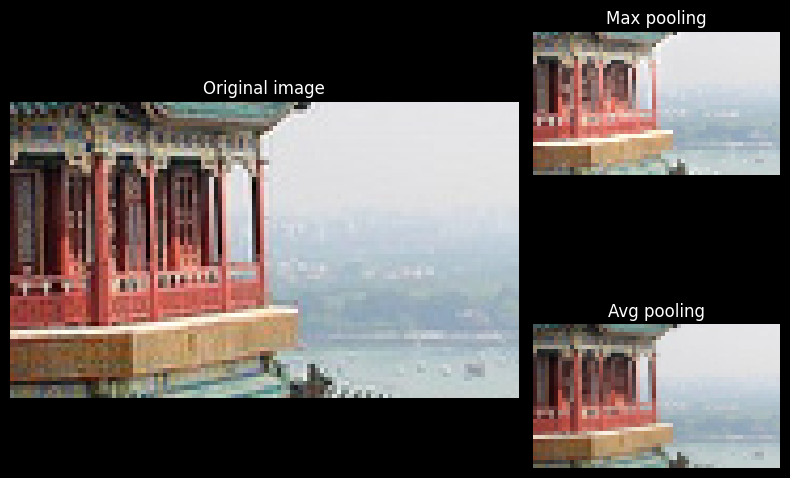

In [34]:

fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2)
ax1.imshow(cropped_images[0].permute(1, 2, 0))
ax1.axis('off')
ax1.set_title("Original image")

ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.imshow(output_max[0].permute(1, 2, 0))
ax2.axis('off')
ax2.set_title("Max pooling")

ax3 = plt.subplot2grid((2, 3), (1, 2))
ax3.imshow(output_avg[0].permute(1, 2, 0))
ax3.axis('off')
ax3.set_title("Avg pooling")

plt.tight_layout()
plt.show()
